<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Projetos de Análise de Dados com Linguagem Python</font>
# <font color='blue'>Projeto 2 - Técnicas de Pré-Processamento Para Análise de Dados</font>

## Pacotes Python Usados no Projeto

In [1]:
!pip install -q -U watermark

In [2]:
# A instalação do pacote está no arquivo de requirements. Leia as instruções no arquivo LEIAME.txt
#!pip install -q missingno

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Carregando os Dados

In [5]:
# Carrega o dataset
df_dsa = pd.read_csv("dataset.csv")

In [6]:
type(df_dsa)

pandas.core.frame.DataFrame

In [7]:
# Shape
df_dsa.shape

(500, 5)

In [8]:
# Colunas
df_dsa.columns

Index(['Idade', 'Salario', 'Genero', 'Escolaridade',
       'Score_Exame_Psicotecnico'],
      dtype='object')

In [9]:
# 5 primeiras linhas do dataset
df_dsa.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [10]:
# Amostra dos dados
df_dsa.sample(10)

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
228,25,15004.585938,Outro,Médio,60.0
258,45,25385.360636,Masculino,Superior,NaN
208,38,13813.769228,Outro,Fundamental,32.0
174,20,6501.372460,Feminino,Superior,69.0
427,28,19516.509410,Outro,Superior,63.0
192,43,20860.412043,Outro,Médio,NaN
125,54,33388.384109,Feminino,Médio,69.0
142,58,23083.707437,Masculino,Superior,77.0
99,36,27380.854196,Feminino,Fundamental,29.0
111,27,19689.081560,Masculino,Médio,43.0


In [11]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


## Análise Exploratória de Dados

Esta etapa do processo ajuda a compreender como os dados estão organizados e os eventuais problemas.

In [12]:
# Descrevendo os dados não numéricos
df_dsa.describe(include = object)

,Genero,Escolaridade
count,500,500
unique,3,3
top,Feminino,Médio
freq,169,274


In [13]:
# Descrevendo os dados numéricos
df_dsa.describe()

,Idade,Salario,Score_Exame_Psicotecnico
count,500.000000,450.000000,470.000000
mean,42.848000,21252.781137,61.565957
std,13.189725,8322.933018,17.662523
min,20.000000,-3254.849042,20.000000
25%,31.750000,15139.019963,48.000000
50%,44.000000,21681.102602,61.000000
75%,54.000000,27379.540314,74.000000
max,65.000000,40845.107626,100.000000


### Visualizando a Distribuição das Variáveis Quantitativas

In [14]:
df_dsa.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [15]:
# Extraindo as colunas numéricas com List Comprehension
colunas_selecionadas = [list(df_dsa.columns.values)[i] for i in [0, 1, 4]]

In [16]:
colunas_selecionadas

['Idade', 'Salario', 'Score_Exame_Psicotecnico']

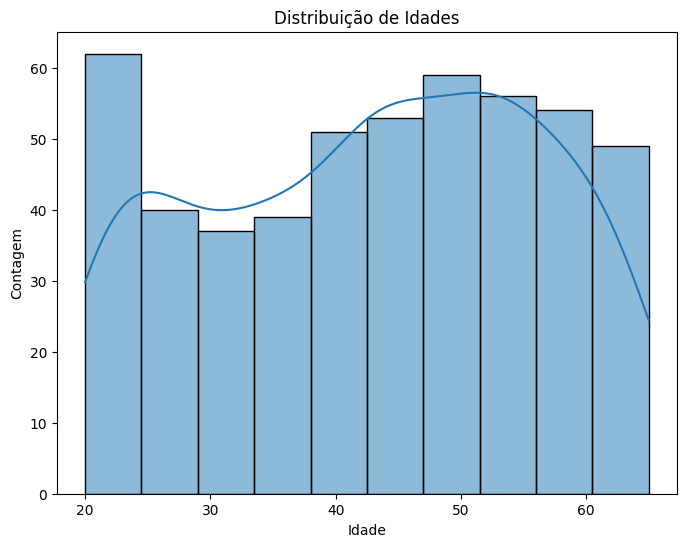

In [17]:
# Distribuição de Idades
plt.figure(figsize = (8, 6))
sns.histplot(df_dsa['Idade'], kde = True)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

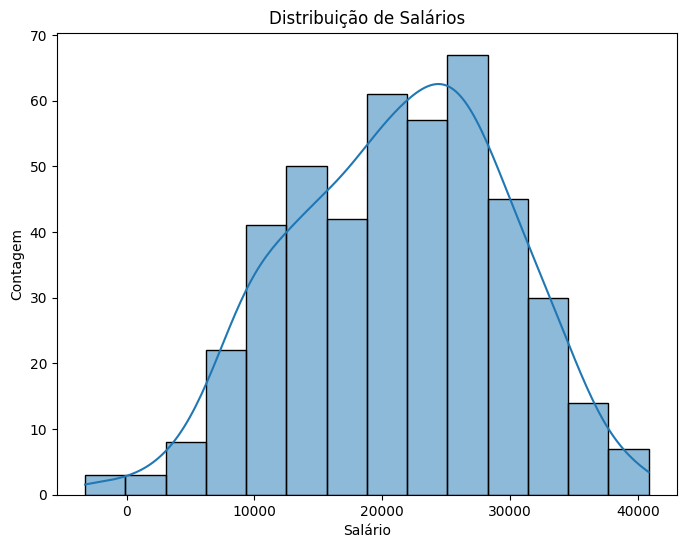

In [18]:
# Distribuição de Salários
plt.figure(figsize = (8, 6))
sns.histplot(df_dsa['Salario'], kde = True)
plt.title('Distribuição de Salários')
plt.xlabel('Salário')
plt.ylabel('Contagem')
plt.show()

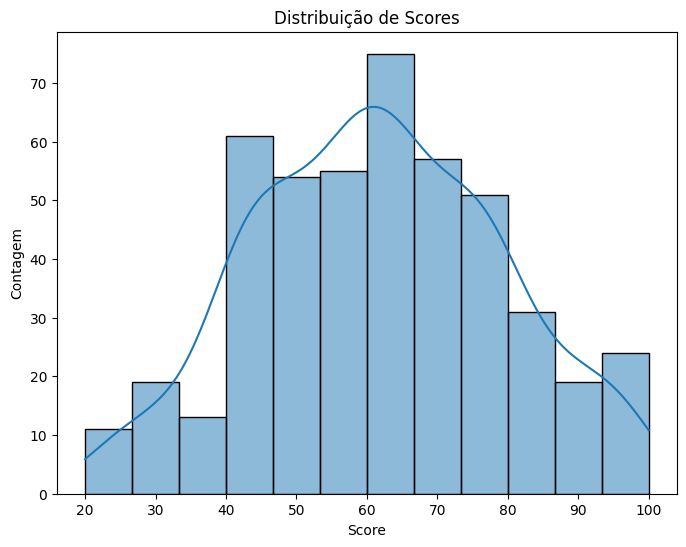

In [19]:
# Distribuição de Scores
plt.figure(figsize = (8, 6))
sns.histplot(df_dsa['Score_Exame_Psicotecnico'], kde = True)
plt.title('Distribuição de Scores')
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.show()

### Visualizando a Distribuição das Variáveis Qualitativas

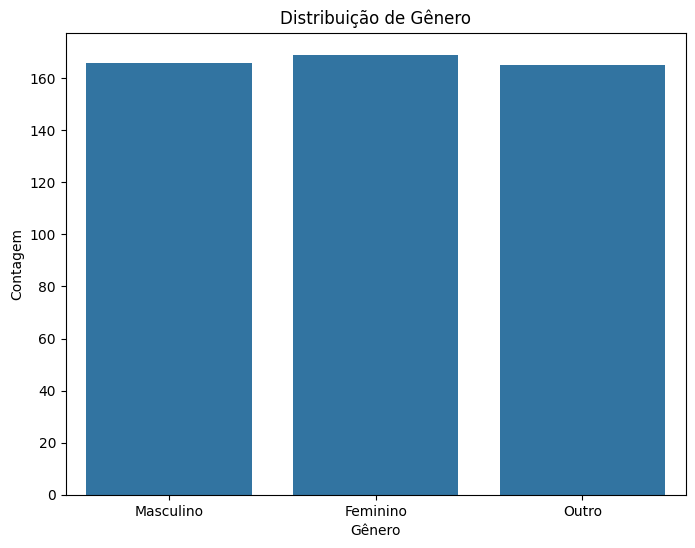

In [20]:
# Distribuição de Gênero
plt.figure(figsize = (8, 6))
sns.countplot(data = df_dsa, x = 'Genero')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

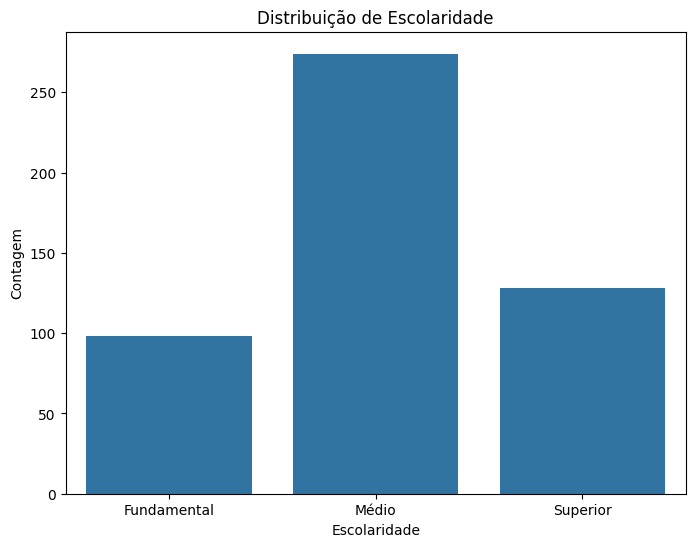

In [21]:
# Distribuição de Escolaridade
plt.figure(figsize = (8, 6))
sns.countplot(data = df_dsa, x = 'Escolaridade', order = ['Fundamental', 'Médio', 'Superior'])
plt.title('Distribuição de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.show()

### Correlação Entre Variáveis Quantitativas

A correlação entre as variáveis quantitativas nos permite entender como uma variável se move em relação à outra. O método mais comum para calcular a correlação entre variáveis é usando o coeficiente de correlação de Pearson, que varia entre -1 e 1. 

- Quanto mais próximo de 1, mais forte é a correlação positiva.
- Quanto mais próximo de -1, mais forte é a correlação negativa. 
- Próximo de 0 indica pouca ou nenhuma correlação.

Vamos calcular a matriz de correlação e depois visualizá-la em um mapa de calor:

In [22]:
# Calculando a matriz de correlação apenas para as variáveis quantitativas
correlation_matrix = df_dsa[  ['Idade', 'Salario', 'Score_Exame_Psicotecnico']  ].corr()

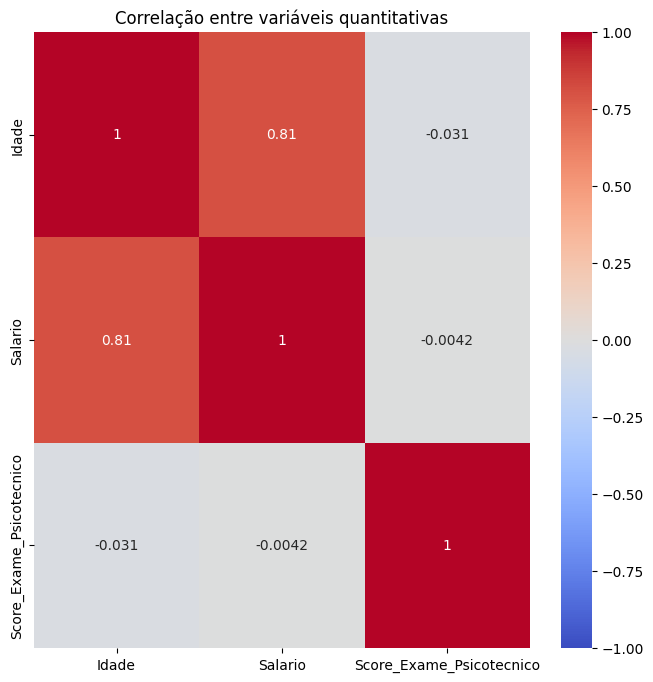

In [23]:
# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize = (8, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlação entre variáveis quantitativas')
plt.show()

### Associação Entre Variáveis Qualitativas

Para variáveis categóricas usamos associação (e não correlação) para analisar a relação entre as variáveis. Vejamos algumas técnicas de associação.

**Tabela de Contingência**: É basicamente uma tabela cruzada (crosstab) que mostra a frequência (ou contagem) de observações em cada categoria para duas variáveis.

In [24]:
# Tabela de Contingência
tabela_contingencia = pd.crosstab(df_dsa['Genero'], df_dsa['Escolaridade'])

In [25]:
print(tabela_contingencia)

Escolaridade  Fundamental  Médio  Superior
Genero                                    
Feminino               31     90        48
Masculino              32     95        39
Outro                  35     89        41


**Teste do Qui-quadrado (χ²)**: É usado para testar a independência entre duas variáveis categóricas. 

O Teste do Qui-quadrado (chi-quadrado) é uma técnica estatística que é usada para determinar se há uma associação significativa entre duas variáveis categóricas em um conjunto de dados. Existem várias hipóteses associadas ao teste do qui-quadrado:

Hipótese Nula (H0): A hipótese nula afirma que não há associação significativa entre as duas variáveis categóricas no conjunto de dados. Em outras palavras, as duas variáveis são independentes uma da outra.

Hipótese Alternativa (H1 ou Ha): A hipótese alternativa é a negação da hipótese nula. Ela sugere que há uma associação significativa entre as duas variáveis categóricas no conjunto de dados. Em termos simples, as duas variáveis não são independentes.

Aplicamos o teste e analisamos o valor-p. Se o valor-p for menor que um nível de significância (geralmente 0,05), podemos rejeitar a hipótese nula de que as variáveis são independentes.

In [26]:
# Carrega a função chi2_contingency
from scipy.stats import chi2_contingency

In [27]:
# Aplica a função chi2_contingency
chi2, p, _, _ = chi2_contingency(tabela_contingencia)

In [28]:
print(f"Valor-p do teste Qui-quadrado: {p:.4f}")

Valor-p do teste Qui-quadrado: 0.8300


Nesse caso falhamos em rejeitar a H0. Provavelmente as duas variáveis são independentes uma da outra.

**Coeficiente de Contingência de Cramér (V)**: Mede a força da associação entre duas variáveis nominais. Seu valor varia de 0 (sem associação) a 1 (associação perfeita). É baseado no valor do qui-quadrado.

In [29]:
# Calculando o Coeficiente de Contingência de Cramér
n = tabela_contingencia.sum().sum()
phi2 = chi2 / n
r, k = tabela_contingencia.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(f"Coeficiente de Cramér V: {cramers_v:.4f}")

Coeficiente de Cramér V: 0.0385


Provavelmente não há associação entre as variáveis.

## Técnicas de Pré-Processamento de Dados

Até aqui analisamos e exploramos os dados. Usamos o resultado desse trabalho para decidir o tipo de processamento que devemos realizar. Começaremos pelo tratamento de valores ausentes, duplicatas e valores negativos.

### Valores Duplicados

In [30]:
df_dsa.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [31]:
# Usamos o método duplicated() para criar uma série de valores booleanos indicando duplicatas
duplicatas = df_dsa.duplicated()

In [32]:
# Exibe as linhas que estão duplicadas
df_dsa[duplicatas]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


> Não há linhas duplicadas.

### Valores Negativos

In [33]:
# Varificamos valores negativos na coluna Salario
df_dsa[df_dsa['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
94,20,-619.478622,Masculino,Médio,58.0
358,21,-2984.433215,Masculino,Médio,43.0
380,20,-3254.849042,Outro,Médio,50.0


> Valores negativos na variável Salario serão convertidos em valores ausentes e então faremos o tratamento de valores ausentes.

In [34]:
# Substituímos valores negativos por NaN (valores ausentes)
df_dsa['Salario'] = df_dsa['Salario'].apply(lambda x: x if x >= 0 else None)

In [35]:
# Varificamos valores negativos na coluna Salario
df_dsa[df_dsa['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


> Agora vamos tratar os valores ausentes.

### Valores Ausentes

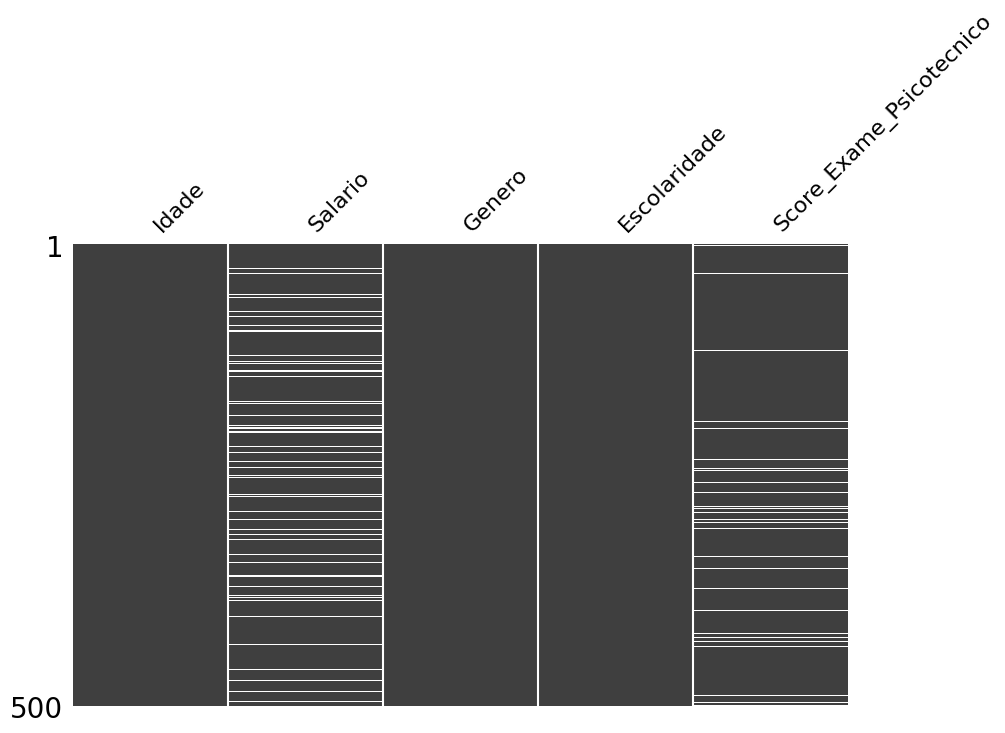

In [36]:
# Mapa de valores ausentes
msno.matrix(df_dsa, figsize = (10, 6), sparkline = False)
plt.show()

Neste gráfico, a presença de dados é representada por barras escuras e os valores ausentes são representados por espaços em branco. O lado direito do gráfico fornece um gráfico de barras que indica a quantidade total de valores presentes para cada variável.



In [37]:
# Usamos o método isna() para verificar valores ausentes em cada coluna
valores_ausentes = df_dsa.isna().sum()

In [38]:
print(valores_ausentes)

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [39]:
# Calcular a porcentagem de valores ausentes em cada coluna
porcentagem_ausentes = (df_dsa.isna().mean() * 100).round(2)

In [40]:
print(porcentagem_ausentes)

Idade                        0.0
Salario                     10.6
Genero                       0.0
Escolaridade                 0.0
Score_Exame_Psicotecnico     6.0
dtype: float64


### Estratégias de Tratamento de Valores Ausentes

Quando você tem uma variável com valores ausentes, como nesse caso em que a variável "salario" tem 10% de valores ausentes, existem várias estratégias que você pode considerar para lidar com esses valores ausentes. A escolha da estratégia depende do contexto dos seus dados e do objetivo da análise. Algumas das estratégias comuns incluem:

**Remoção de linhas**: Você pode optar por remover as linhas que contêm valores ausentes na coluna "salario". Isso é apropriado se a quantidade de dados faltantes for pequena em relação ao tamanho total do conjunto de dados e se a remoção não introduzir viés nos seus resultados. No entanto, essa estratégia pode levar à perda de informações.

**Preenchimento com um valor padrão**: Dependendo do contexto, você pode optar por preencher os valores ausentes com um valor padrão, como a média, a mediana ou um valor específico. Isso pode ser apropriado se você acredita que os valores ausentes não são críticos e que um valor padrão não afetará significativamente a análise.

**Preenchimento com base em outras variáveis**: Às vezes, você pode usar informações de outras variáveis do dataset para preencher os valores ausentes de "salario". Por exemplo, você pode preencher com a média dos salários de pessoas com a mesma escolaridade ou o mesmo gênero.

**Modelo de previsão**: Se a variável "salario" for importante e os valores ausentes não puderem ser facilmente preenchidos com médias ou valores padrão, você pode criar um modelo preditivo para estimar os valores ausentes com base em outras variáveis relevantes. Isso é mais complexo, mas pode ser uma abordagem poderosa se você tiver dados suficientes e a variável "salario" for fundamental para sua análise.

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

### Teste de Normalidade Para Decidir a Estratégia de Tratamento de Valores Ausentes

Para preencher os valores ausentes com a média devemos verificar se a variável segue uma distribuição normal. Se a variável seguir uma distribuição normal, podemos usar a média ou a mediana. Caso contrário devemos usar a mediana.

In [41]:
from scipy import stats

# Extraia a coluna "salario" em uma série
salario = df_dsa['Salario']

# Aplique o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(salario)

# Imprima o resultado do teste
print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Verifique a hipótese nula com base no p-valor
alfa = 0.05  # Nível de significância
if p_valor > alfa:
    print("Não há evidências para rejeitar a hipótese nula (os dados parecem seguir uma distribuição normal).")
else:
    print("A hipótese nula é rejeitada (os dados não seguem uma distribuição normal).")

Estatística de teste: nan
Valor-p: nan
A hipótese nula é rejeitada (os dados não seguem uma distribuição normal).


> Podemos então usar a média e preencher os valores ausentes. Essa técnica é chamada de imputação.

### Imputação Para Tratamento de Valores Ausentes

In [42]:
# Calculamos a média da variável "Salario" (ignorando os valores ausentes)
media_salario = df_dsa['Salario'].mean()

In [43]:
# Preenchemos os valores ausentes em "salario" com a média
df_dsa['Salario'].fillna(media_salario, inplace = True)

In [44]:
# Usamos o método isna() para verificar valores ausentes em cada coluna
valores_ausentes = df_dsa.isna().sum()
print(valores_ausentes)

Idade                        0
Salario                      0
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [45]:
from scipy import stats

# Extraia a coluna "salario" em uma série
score_exame = df_dsa['Score_Exame_Psicotecnico']

# Aplique o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(score_exame)

# Imprima o resultado do teste
print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Verifique a hipótese nula com base no p-valor
alfa = 0.05  # Nível de significância
if p_valor > alfa:
    print("Não há evidências para rejeitar a hipótese nula (os dados parecem seguir uma distribuição normal).")
else:
    print("A hipótese nula é rejeitada (os dados não seguem uma distribuição normal).")

Estatística de teste: nan
Valor-p: nan
A hipótese nula é rejeitada (os dados não seguem uma distribuição normal).


> Podemos então usar a média e preencher os valores ausentes. Essa técnica é chamada de imputação.

In [46]:
# Calculamos a média da variável "Salario" (ignorando os valores ausentes)
media_score = df_dsa['Score_Exame_Psicotecnico'].mean()

In [47]:
# Preenchemos os valores ausentes em "salario" com a média
df_dsa['Score_Exame_Psicotecnico'].fillna(media_score, inplace = True)

In [48]:
# Usamos o método isna() para verificar valores ausentes em cada coluna
valores_ausentes = df_dsa.isna().sum()
print(valores_ausentes)

Idade                       0
Salario                     0
Genero                      0
Escolaridade                0
Score_Exame_Psicotecnico    0
dtype: int64


> Vimos que há correlação entre Idade e Salário. Mas se mudarmos a variável Idade para Faixa_Etaria, essa relação se confirma?

### Teste Estatístico de Relação Entre Variável Quantitativa e Qualitativa

In [49]:
df_dsa.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.000000
1,48,20886.502401,Feminino,Médio,61.565957
2,34,15959.388748,Masculino,Médio,57.000000
3,62,28534.995327,Outro,Superior,68.000000
4,27,10553.176215,Outro,Fundamental,44.000000


In [50]:
# Definimos as faixas etárias desejadas em ordem crescente
faixas_etarias = [0, 25, 35, 45, 55, float('inf')]  

In [51]:
# Definimos os rótulos para as faixas etárias
rotulos_faixas = ["Menos de 25", "25-34", "35-44", "45-54", "55 ou mais"]

In [52]:
# Usamos a função pd.cut() para criar a variável de faixa etária
df_dsa['Faixa_Etaria'] = pd.cut(df_dsa['Idade'], bins = faixas_etarias, labels = rotulos_faixas)

In [53]:
df_dsa.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
0,58,30404.959339,Masculino,Médio,56.000000,55 ou mais
1,48,20886.502401,Feminino,Médio,61.565957,45-54
2,34,15959.388748,Masculino,Médio,57.000000,25-34
3,62,28534.995327,Outro,Superior,68.000000,55 ou mais
4,27,10553.176215,Outro,Fundamental,44.000000,25-34


In [54]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Idade                     500 non-null    int64   
 1   Salario                   500 non-null    float64 
 2   Genero                    500 non-null    object  
 3   Escolaridade              500 non-null    object  
 4   Score_Exame_Psicotecnico  500 non-null    float64 
 5   Faixa_Etaria              500 non-null    category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 20.4+ KB


In [55]:
# Usamos o método drop() para remover a variável "idade"
df_dsa.drop('Idade', axis = 1, inplace = True)

In [56]:
df_dsa.head()

,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
0,30404.959339,Masculino,Médio,56.000000,55 ou mais
1,20886.502401,Feminino,Médio,61.565957,45-54
2,15959.388748,Masculino,Médio,57.000000,25-34
3,28534.995327,Outro,Superior,68.000000,55 ou mais
4,10553.176215,Outro,Fundamental,44.000000,25-34


In [57]:
# Arredondamos as colunas "Salario" e "Score_Exame_Psicotecnico" para inteiros
df_dsa['Salario'] = df_dsa['Salario'].round().astype(int)
df_dsa['Score_Exame_Psicotecnico'] = df_dsa['Score_Exame_Psicotecnico'].round().astype(int)

In [58]:
df_dsa.head()

,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
0,30405,Masculino,Médio,56,55 ou mais
1,20887,Feminino,Médio,62,45-54
2,15959,Masculino,Médio,57,25-34
3,28535,Outro,Superior,68,55 ou mais
4,10553,Outro,Fundamental,44,25-34


In [59]:
df_dsa.describe()

,Salario,Score_Exame_Psicotecnico
count,500.00000,500.000000
mean,21410.79200,61.592000
std,7679.06567,17.123667
min,642.00000,20.000000
25%,15888.75000,49.000000
50%,21411.00000,62.000000
75%,26729.00000,73.250000
max,40845.00000,100.000000


In [60]:
# Média de salário por faixa etária
media_salario_por_faixa_etaria = df_dsa.groupby('Faixa_Etaria')['Salario'].mean()
media_salario_por_faixa_etaria

Faixa_Etaria
Menos de 25    13108.633803
25-34          14945.184783
35-44          20980.654545
45-54          24736.491935
55 ou mais     29364.359223
Name: Salario, dtype: float64

In [61]:
# Mediana de salário por faixa etária
mediana_salario_por_faixa_etaria = df_dsa.groupby('Faixa_Etaria')['Salario'].median()
mediana_salario_por_faixa_etaria

Faixa_Etaria
Menos de 25    12433.0
25-34          15387.5
35-44          21411.0
45-54          24283.0
55 ou mais     29345.0
Name: Salario, dtype: float64

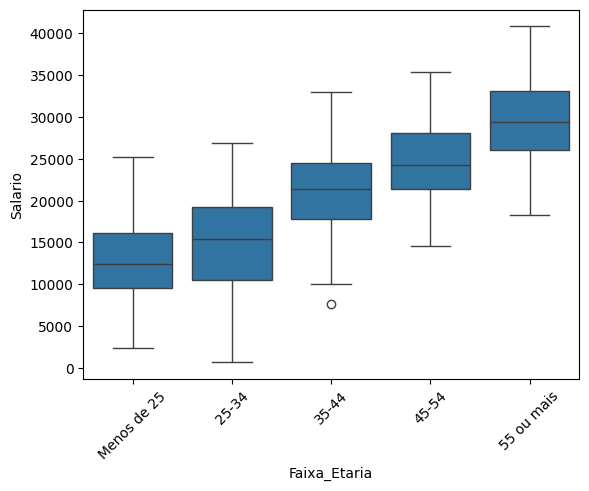

In [62]:
# Boxplots
sns.boxplot(x = 'Faixa_Etaria', y = 'Salario', data = df_dsa)
plt.xticks(rotation = 45)
plt.show()

In [63]:
# Teste ANOVA

# Import
import scipy.stats as stats

# Realize um teste de ANOVA para verificar as diferenças nas médias
resultado_anova = stats.f_oneway(*[grupo['Salario'] for nome, grupo in df_dsa.groupby('Faixa_Etaria')])

# Verifique o resultado do teste
if resultado_anova.pvalue < 0.05:
    print("Há evidências de diferenças significativas nas médias de salário entre as faixas etárias.")
else:
    print("Não há evidências de diferenças significativas nas médias de salário entre as faixas etárias.")

Há evidências de diferenças significativas nas médias de salário entre as faixas etárias.


> Sim, a relação realmente existe entre idade e salário.

## Relatório Final

Com base em nossa análise observamos que:

- A variável Salario apresentava valores negativos. Como não temos mais detalhes sobre isso, decidimos converter de valor negativo para valor ausente.
- As variáveis Salario e Score_Exame_Psicotecnico apresentavam problemas de valores ausentes.
- Tratamos os valores ausentes com a imputação da média pois as duas variáveis seguem uma distribuição normal.
- Identificamos que não há relação entre as variáveis gênero e escolaridade, ou seja, elas são independentes.
- Verificamos que há relação entre idade e salário, independente do valor individual da idade ou de faixa etária.
- Nossas conclusões e decisões foram baseadas em testes estatísticos.

In [64]:
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [65]:
#%watermark

In [66]:
#%watermark --iversions

# Fim